In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../Datasets/Kaggle sber bank/train.csv')
test_df = pd.read_csv('../Datasets/Kaggle sber bank/test.csv')

In [3]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [5]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [6]:
test_df['price_doc'] = -1234

In [7]:
df = pd.concat((df, test_df), axis = 0)

In [8]:
df.iloc[:5,:20]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion
0,1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5
1,2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5
2,3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4
3,4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9
4,5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7


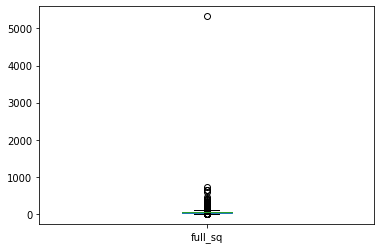

In [9]:
df.full_sq.plot(kind = 'box');

In [10]:
#finding all the missing cols
df.columns[df.isnull().any()]

Index(['life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room',
       'kitch_sq', 'state', 'product_type', 'preschool_quota', 'school_quota',
       'hospital_beds_raion', 'raion_build_count_with_material_info',
       'build_count_block', 'build_count_wood', 'build_count_frame',
       'build_count_brick', 'build_count_monolith', 'build_count_panel',
       'build_count_foam', 'build_count_slag', 'build_count_mix',
       'raion_build_count_with_builddate_info', 'build_count_before_1920',
       'build_count_1921-1945', 'build_count_1946-1970',
       'build_count_1971-1995', 'build_count_after_1995', 'metro_min_walk',
       'metro_km_walk', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'ID_railroad_station_walk',
       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg',
       'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000',
       'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df.life_sq.isnull().any()

False

In [13]:
df.loc[:, df.dtypes == object]

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2016-05-26,Investment,Kon'kovo,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory
7658,2016-05-28,OwnerOccupier,Poselenie Desjonovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
7659,2016-05-30,OwnerOccupier,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,excellent
7660,2016-05-30,Investment,Orehovo-Borisovo Juzhnoe,no,no,no,no,no,no,yes,no,no,no,no,no,poor


In [14]:
df['culture_objects_top_25'] = df['culture_objects_top_25'].map({'yes': 1, 'no': 0})

In [15]:
df["incineration_raion"] = df['incineration_raion'].map({'yes': 1, 'no': 0})
df["thermal_power_plant_raion"] = df['thermal_power_plant_raion'].map({'yes': 1, 'no': 0})
df["oil_chemistry_raion"] = df['oil_chemistry_raion'].map({'yes': 1, 'no': 0})
df["radiation_raion"] = df['radiation_raion'].map({'yes': 1, 'no': 0})
df["railroad_terminal_raion"] = df['railroad_terminal_raion'].map({'yes': 1, 'no': 0})
df["big_market_raion"] = df['big_market_raion'].map({'yes': 1, 'no': 0})
df["nuclear_reactor_raion"] = df['nuclear_reactor_raion'].map({'yes': 1, 'no': 0})
df["detention_facility_raion"] = df['detention_facility_raion'].map({'yes': 1, 'no': 0})
df["water_1line"] = df['water_1line'].map({'yes': 1, 'no': 0})
df["big_road1_1line"] = df['big_road1_1line'].map({'yes': 1, 'no': 0})
df["railroad_1line"] = df['railroad_1line'].map({'yes': 1, 'no': 0})

In [16]:
df["railroad_1line"]

0       0
1       0
2       0
3       0
4       1
       ..
7657    0
7658    0
7659    0
7660    0
7661    0
Name: railroad_1line, Length: 38133, dtype: int64

In [17]:
df.loc[:, df.dtypes == object]

,timestamp,product_type,sub_area,ecology
0,2011-08-20,Investment,Bibirevo,good
1,2011-08-23,Investment,Nagatinskij Zaton,excellent
2,2011-08-27,Investment,Tekstil'shhiki,poor
3,2011-09-01,Investment,Mitino,good
4,2011-09-05,Investment,Basmannoe,excellent
...,...,...,...,...
7657,2016-05-26,Investment,Kon'kovo,satisfactory
7658,2016-05-28,OwnerOccupier,Poselenie Desjonovskoe,no data
7659,2016-05-30,OwnerOccupier,Tverskoe,excellent
7660,2016-05-30,Investment,Orehovo-Borisovo Juzhnoe,poor


In [18]:
df.product_type.unique()

array(['Investment', 'OwnerOccupier', nan], dtype=object)

In [19]:
df["product_type"] = df['product_type'].map({'Investment': 1, 'OwnerOccupier': 0})

In [20]:
df.ecology.unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

In [21]:
df["ecology"] = df['ecology'].map({"excellent": 4,"good": 3,"satisfactory": 2,'poor': 1, 'no data': 0})

In [22]:
df.ecology


0       3
1       4
2       1
3       3
4       4
       ..
7657    2
7658    0
7659    4
7660    1
7661    1
Name: ecology, Length: 38133, dtype: int64

In [23]:
df.drop("timestamp",axis = 1,inplace=True)

In [24]:
df.sub_area

0                       Bibirevo
1              Nagatinskij Zaton
2                 Tekstil'shhiki
3                         Mitino
4                      Basmannoe
                  ...           
7657                    Kon'kovo
7658      Poselenie Desjonovskoe
7659                    Tverskoe
7660    Orehovo-Borisovo Juzhnoe
7661         Chertanovo Severnoe
Name: sub_area, Length: 38133, dtype: object

In [25]:
df.sub_area.unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe',
       'Lefortovo', "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo",
       'Vnukovo', 'Juzhnoe Tushino', 'Severnoe Tushino',
       "Chertanovo Central'noe", 'Fili Davydkovo', 'Otradnoe',
       'Novo-Peredelkino', 'Bogorodskoe', 'Jaroslavskoe', 'Strogino',
       'Hovrino', "Moskvorech'e-Saburovo", 'Staroe Krjukovo', 'Ljublino',
       'Caricyno', 'Veshnjaki', 'Danilovskoe', 'Preobrazhenskoe',
       "Kon'kovo", 'Brateevo', 'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino',
       'Donskoe', 'Novogireevo', 'Juzhnoe Butovo', 'Sokol', 'Kurkino',
       'Izmajlovo', 'Severnoe Medvedkovo', 'Rostokino',
       'Orehovo-Borisovo Severnoe', 'Ochakovo-Matveevskoe', 'Taganskoe',
       'Dmitrovskoe', 'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan',
       'Babushkinskoe', 'Pokrovskoe Streshnevo', 'Obruc

In [26]:
df.drop("sub_area",axis = 1,inplace=True)

In [27]:
df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,43.00,27.00000,4.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,9,4,0,13,22,1,0,52,4,5850000
1,2,34.00,19.00000,3.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,15,3,0,15,29,1,10,66,14,6000000
2,3,43.00,29.00000,2.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,10,3,0,11,27,0,4,67,10,5700000
3,4,89.00,50.00000,9.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,11,2,1,4,4,0,0,26,3,13100000
4,5,77.00,77.00000,4.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,52.20,31.80000,10.0,12.000000,5.00000,1973.000000,2.000000,9.100000,2.00000,...,28,1,1,8,39,2,3,75,12,-1234
7658,38132,54.09,34.03346,14.0,0.000000,1.00000,2716.784531,2.000000,0.000000,2.07165,...,2,1,0,0,10,0,0,0,0,-1234
7659,38133,41.08,1.00000,12.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,...,371,141,26,150,249,2,105,203,13,-1234
7660,38134,34.80,19.80000,8.0,9.000000,5.00000,1977.000000,1.000000,6.400000,2.00000,...,7,2,0,5,11,0,2,43,10,-1234


In [28]:
df.columns[df.isnull().any()]


Index(['product_type'], dtype='object')

In [29]:
df.thermal_power_plant_raion.unique()

array([0, 1], dtype=int64)

In [30]:
df.product_type

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7657    1.0
7658    0.0
7659    0.0
7660    1.0
7661    1.0
Name: product_type, Length: 38133, dtype: float64

In [31]:
df.product_type.isnull().any()

True

In [32]:
df.product_type.unique()

array([ 1.,  0., nan])

In [33]:
df.product_type.value_counts()

1.0    24446
0.0    13654
Name: product_type, dtype: int64

In [34]:
df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,43.00,27.00000,4.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,9,4,0,13,22,1,0,52,4,5850000
1,2,34.00,19.00000,3.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,15,3,0,15,29,1,10,66,14,6000000
2,3,43.00,29.00000,2.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,10,3,0,11,27,0,4,67,10,5700000
3,4,89.00,50.00000,9.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,11,2,1,4,4,0,0,26,3,13100000
4,5,77.00,77.00000,4.0,12.567592,1.83439,2716.784531,1.900844,6.543995,2.07165,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,52.20,31.80000,10.0,12.000000,5.00000,1973.000000,2.000000,9.100000,2.00000,...,28,1,1,8,39,2,3,75,12,-1234
7658,38132,54.09,34.03346,14.0,0.000000,1.00000,2716.784531,2.000000,0.000000,2.07165,...,2,1,0,0,10,0,0,0,0,-1234
7659,38133,41.08,1.00000,12.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,...,371,141,26,150,249,2,105,203,13,-1234
7660,38134,34.80,19.80000,8.0,9.000000,5.00000,1977.000000,1.000000,6.400000,2.00000,...,7,2,0,5,11,0,2,43,10,-1234


In [35]:
df.fillna(df.mean(), inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38133 entries, 0 to 7661
Columns: 290 entries, id to price_doc
dtypes: float64(121), int64(169)
memory usage: 84.7 MB


In [37]:
df[df.price_doc == -1234].price_doc.value_counts()

-1234    7662
Name: price_doc, dtype: int64

In [38]:
train_df = df[df.price_doc != -1234]
test_df = df[df.price_doc == -1234]

In [39]:
df = train_df

In [40]:
labels = df.iloc[:,-1:]

In [41]:
Features = df.iloc[:,:-1]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Features, labels, test_size=0.20, random_state=42)

In [44]:

from sklearn.dummy import DummyClassifier

In [45]:

dummy_model = DummyClassifier(strategy="most_frequent")

In [46]:

dummy_model.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [47]:
dummy_model.score(X_test, y_test)
# the score is 0.02

0.024774405250205085

In [48]:
predictions = dummy_model.predict(X_test)

In [49]:
from sklearn import metrics

In [50]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5108026.110418376
MSE: 46690890042340.375
RMSE: 6833073.250181091


In [51]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print("Confusion Matrix: ", metrics.confusion_matrix(y_test, predictions))


Accuracy:  0.024774405250205085
Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
predictions

array([2000000, 2000000, 2000000, ..., 2000000, 2000000, 2000000],
      dtype=int64)

In [53]:
y_test

,price_doc
4739,12319849
26793,6800000
6983,4650000
11307,1200000
20974,5650000
...,...
8505,5856084
17816,5500000
1192,7700000
12193,4400000


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression()

In [56]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
regressor.score(X_test,y_test)

# by using simple LinearRegression we increased the score from 0.02 to 44.9

0.4497659807891726

In [58]:
predictions = regressor.predict(X_test)

In [59]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1939251.116682103
MSE: 11775553117969.223
RMSE: 3431552.5812624847


In [60]:

predictions

array([[10377549.18859651],
       [ 7495066.70871145],
       [ 2211919.87113347],
       ...,
       [ 5532754.38617869],
       [ 2545778.25591573],
       [11066821.21448563]])

In [61]:
y_test

,price_doc
4739,12319849
26793,6800000
6983,4650000
11307,1200000
20974,5650000
...,...
8505,5856084
17816,5500000
1192,7700000
12193,4400000


In [62]:
test_df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,30474,39.00,20.70000,2.0,9.0,1.0,1998.000000,1.0,8.9,3.00000,...,0,0,0,1,10,1,0,14,1,-1234
1,30475,79.20,34.03346,8.0,17.0,1.0,0.000000,3.0,1.0,1.00000,...,1,1,0,2,11,0,1,12,1,-1234
2,30476,40.50,25.10000,3.0,5.0,2.0,1960.000000,2.0,4.8,2.00000,...,11,4,0,10,21,0,10,71,11,-1234
3,30477,62.80,36.00000,17.0,17.0,1.0,2016.000000,2.0,62.8,3.00000,...,1,2,0,0,10,0,0,2,0,-1234
4,30478,40.00,40.00000,17.0,17.0,1.0,0.000000,1.0,1.0,1.00000,...,1,1,0,2,12,0,1,11,1,-1234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,52.20,31.80000,10.0,12.0,5.0,1973.000000,2.0,9.1,2.00000,...,28,1,1,8,39,2,3,75,12,-1234
7658,38132,54.09,34.03346,14.0,0.0,1.0,2716.784531,2.0,0.0,2.07165,...,2,1,0,0,10,0,0,0,0,-1234
7659,38133,41.08,1.00000,12.0,1.0,1.0,1.000000,1.0,1.0,1.00000,...,371,141,26,150,249,2,105,203,13,-1234
7660,38134,34.80,19.80000,8.0,9.0,5.0,1977.000000,1.0,6.4,2.00000,...,7,2,0,5,11,0,2,43,10,-1234


In [63]:
test_df.drop("price_doc", inplace = True, axis = 1)

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
test_X = test_df.as_matrix().astype('float')

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [65]:
predictions = regressor.predict(test_X)

In [66]:
predictions.reshape(7662)

array([ 6017243.087106  ,  9955091.5690054 ,  7102640.13955435, ...,
        4575269.59638191,  6150795.66509126, 10828075.58905092])

In [67]:
test = pd.DataFrame({"id": test_df.id}) 

In [68]:
test["price_doc"] =  predictions

In [69]:
test["price_doc"]

0       6.017243e+06
1       9.955092e+06
2       7.102640e+06
3       8.650022e+06
4       5.305787e+06
            ...     
7657    9.891392e+06
7658    6.621685e+06
7659    4.575270e+06
7660    6.150796e+06
7661    1.082808e+07
Name: price_doc, Length: 7662, dtype: float64

In [70]:
test.head()

,id,price_doc
0,30474,6.017243e+06
1,30475,9.955092e+06
2,30476,7.102640e+06
3,30477,8.650022e+06
4,30478,5.305787e+06


In [77]:
import os
path = os.getcwd()
path

'C:\\Users\\iad7kor\\Desktop\\sasi\\repos\\Artificial Intelligence\\ML\\Scikit Learn\\Supervised\\Regression\\proj'

In [79]:
test.to_csv(index = False)

'id,price_doc\r\n30474,6017243.087106004\r\n30475,9955091.5690054\r\n30476,7102640.13955435\r\n30477,8650022.068213947\r\n30478,5305787.0810317155\r\n30479,9780562.134887733\r\n30480,5831804.656422012\r\n30481,4099155.2300865958\r\n30482,7812219.703316507\r\n30483,4293317.64149276\r\n30484,7869822.263489257\r\n30485,4907480.7682417985\r\n30486,3780818.120846123\r\n30487,3247870.3816479077\r\n30488,5722528.378228303\r\n30489,6856351.61455082\r\n30490,15344525.247400265\r\n30491,15116289.218966763\r\n30492,5182205.388961515\r\n30493,15186599.956350565\r\n30494,6844473.832023537\r\n30495,12428077.688245196\r\n30496,9576693.288260613\r\n30497,11856523.289239477\r\n30498,3841170.795025783\r\n30499,9330185.419585967\r\n30500,11768398.060277786\r\n30501,8357616.158317189\r\n30502,3966204.689126368\r\n30503,8819085.045260573\r\n30504,6107341.495581766\r\n30505,12923079.570953798\r\n30506,3268785.00045585\r\n30507,4745802.091300003\r\n30508,8075519.267505997\r\n30509,7998953.064238347\r\n30510,